### FASE 1: EDA

In [ ]:
# importamos las librer칤as que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaci칩n
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribuci칩n de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Librerias para imputar nulos
# ------------------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuraci칩n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gesti칩n de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [47]:
df_ans_dep = pd.read_csv("anxiety_depression_data.csv")
df_ans_dep.head()

Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  Family_History_Mental_Illness  \
0                 2             9                              0   
1                 7             6                              0   
2                13             8                              0   
3                 3             4                              1   
4                15             3                              0   

   Chronic_Illnesses Medication_Use  Therapy  Meditation Substance_Use  \
0                  0            NaN        0           1           NaN   
1                  0            NaN        1           0           NaN   
2                  0            NaN        0           1           NaN   
3                  1            NaN        0           0           NaN   
4                  0            NaN        1           1      Frequent   

   Financial_Stress  Work_Stress  Self_Esteem_Score  Life_Satisfaction_Score  \
0                 4            3                  7                        5   
1                 1            4                  7                        4   
2                 8            7                  8                        1   
3                 7            4                  8                        4   
4                 8            9                  5                        7   

   Loneliness_Score  
0                 1  
1                 6  
2                 1  
3                 4  
4                 7

In [48]:
def exploracion_df(data):
    print("Las primeras filas del dataset son:")
    print("--------------------------------------------------------")
    print(data.head())
    print("--------------------------------------------------------")
    print("Las columnas del dataset son:")
    print("--------------------------------------------------------")
    print(data.columns)
    print("--------------------------------------------------------")
    print("La forma del dataset es:")
    print("--------------------------------------------------------")
    print(data.shape)
    print("--------------------------------------------------------")
    print("La info de las columnas num칠ricas del dataset es:")
    print("--------------------------------------------------------")
    print(data.describe)
    print("--------------------------------------------------------")
    print("La info general del dataset es:")
    print("--------------------------------------------------------")
    print(data.info)

In [49]:
data = df_ans_dep

exploracion_df(data)

Las primeras filas del dataset son:
--------------------------------------------------------
   Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  Family_History_Mental_Illness  \
0                 2             9                        

In [51]:
# Funci칩n para cambiar nombre a columnas y que sean homogeneas:

def renombrar_columnas(df):
    nuevas_columnas = {col: col.replace("_", " ") for col in df.columns}
    df.rename(columns=nuevas_columnas, inplace=True)
    return df

In [52]:
df_ans_dep = renombrar_columnas(df_ans_dep)
print(df_ans_dep.columns)  

Index(['Age', 'Gender', 'Education Level', 'Employment Status', 'Sleep Hours',
       'Physical Activity Hrs', 'Social Support Score', 'Anxiety Score',
       'Depression Score', 'Stress Level', 'Family History Mental Illness',
       'Chronic Illnesses', 'Medication Use', 'Therapy', 'Meditation',
       'Substance Use', 'Financial Stress', 'Work Stress', 'Self Esteem Score',
       'Life Satisfaction Score', 'Loneliness Score'],
      dtype='object')


In [ ]:
## Voy a revisar tipo de informaci칩n que contiene cada columna:

# - "Family History Mental Illness" es int pero tiene m치s sentido que sea categ칩rica ya que representa SI o NO
# - "Chronic Illnesses" es int pero tiene m치s sentido que sea categ칩rica ya que representa SI o NO
# - "Therapy" es int pero tiene m치s sentido que sea categ칩rica ya que representa SI o NO
# - "Meditation" es int pero tiene m치s sentido que sea categ칩rica ya que representa SI o NO

In [54]:
def cambiar_tipo_columna(df, columns, new_type='object'):
    for col in columns:
        df[col] = df[col].astype(new_type)
    return df

In [55]:
columnas_a_cambiar = ['Family History Mental Illness', 'Chronic Illnesses', 'Therapy', 'Meditation']

df_ans_dep = cambiar_tipo_columna(df_ans_dep, columnas_a_cambiar)

In [56]:
# Compruebo valores en columnas tipo Object:

for col in df_ans_dep.select_dtypes(include='object'):
    print('----------------------------------------------')
    print('Para la columna:', col)
    print('-------------')
    print('Hay estos valores 칰nicos:')
    print(df_ans_dep[col].unique())
    print('-------------')
    print('Esta es la frecuencia de cada valor 칰nico:')
    print(df_ans_dep[col].value_counts())

----------------------------------------------
Para la columna: Gender
-------------
Hay estos valores 칰nicos:
['Male' 'Female' 'Non-Binary' 'Other']
-------------
Esta es la frecuencia de cada valor 칰nico:
Gender
Female        569
Male          520
Non-Binary     90
Other          21
Name: count, dtype: int64
----------------------------------------------
Para la columna: Education Level
-------------
Hay estos valores 칰nicos:
["Bachelor's" "Master's" 'High School' 'Other' 'PhD']
-------------
Esta es la frecuencia de cada valor 칰nico:
Education Level
PhD            262
Master's       242
High School    242
Other          240
Bachelor's     214
Name: count, dtype: int64
----------------------------------------------
Para la columna: Employment Status
-------------
Hay estos valores 칰nicos:
['Unemployed' 'Retired' 'Employed' 'Student']
-------------
Esta es la frecuencia de cada valor 칰nico:
Employment Status
Employed      320
Student       310
Unemployed    288
Retired       282
Name:

In [57]:
# Compruebo valores en columnas tipo Int:

for col in df_ans_dep.select_dtypes(include='int'):
    print('----------------------------------------------')
    print('Para la columna:', col)
    print('-------------')
    print('Hay estos valores 칰nicos:')
    print(df_ans_dep[col].unique())
    print('-------------')
    print('Esta es la frecuencia de cada valor 칰nico:')
    print(df_ans_dep[col].value_counts())

----------------------------------------------
Para la columna: Age
-------------
Hay estos valores 칰nicos:
[56 69 46 32 60 25 38 36 40 28 41 70 53 57 20 39 19 61 47 55 50 29 42 66
 44 59 45 33 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34 23 71 51 27 48
 65 62 58 18 22 30 49 73 63]
-------------
Esta es la frecuencia de cada valor 칰nico:
Age
43    32
45    30
50    28
52    28
66    28
64    26
54    26
68    26
49    25
62    25
56    25
41    25
70    24
22    24
71    24
18    24
42    24
25    23
40    23
20    23
19    23
72    22
69    22
65    22
53    22
74    22
61    22
23    22
34    22
39    22
33    21
29    21
47    21
36    20
38    19
28    19
21    19
46    19
58    18
32    18
51    18
26    18
31    18
59    17
30    17
57    17
73    17
37    16
67    16
27    16
48    16
35    16
44    16
55    15
24    14
63    13
60    11
Name: count, dtype: int64
----------------------------------------------
Para la columna: Social Support Score
-------------
Hay estos valores 

In [58]:
# Compruebo valores en columnas tipo Float:

for col in df_ans_dep.select_dtypes(include='float'):
    print('----------------------------------------------')
    print('Para la columna:', col)
    print('-------------')
    print('Hay estos valores 칰nicos:')
    print(df_ans_dep[col].unique())
    print('-------------')
    print('Esta es la frecuencia de cada valor 칰nico:')
    print(df_ans_dep[col].value_counts())

----------------------------------------------
Para la columna: Sleep Hours
-------------
Hay estos valores 칰nicos:
[ 6.   8.8  5.3  7.2  4.4  7.1  3.3  7.4  7.8  5.6  6.7  9.4  5.7  4.9
  8.7  6.5  8.   8.5  5.4  5.8  8.3  9.   7.3  5.2  9.5  7.   6.6  2.7
  6.1  6.9  4.8  6.2  9.1  8.9  6.3  6.4  6.8  7.7  4.2  5.5  4.7  4.6
  5.9  5.1  3.8 10.5  5.   7.9  9.2  3.6  8.4  3.9  9.8  7.5  3.4  3.1
  2.4  8.6 12.4  7.6  9.3  4.   2.   4.1  8.2 10.1  4.5  8.1  2.3  3.7
  2.8  3.5  2.1  4.3  9.9 10.8  9.6 10.   9.7  2.6  3.2 10.3 10.2 11.4
  3. ]
-------------
Esta es la frecuencia de cada valor 칰nico:
Sleep Hours
6.8     41
7.2     40
6.4     40
5.9     36
5.7     34
        ..
2.3      1
10.1     1
2.0      1
3.1      1
3.0      1
Name: count, Length: 85, dtype: int64
----------------------------------------------
Para la columna: Physical Activity Hrs
-------------
Hay estos valores 칰nicos:
[ 0.4  2.8  1.6  0.5  0.7  1.3  6.8  2.5  6.3  1.1  4.6  1.5  0.6  1.2
  0.3  0.   0.1  7.6  2.2 

In [ ]:
## Hay nulos en dos columnas ('Medication_Use' y 'Substance_Use'), alto porcentaje

In [60]:
def identificar_nulos(df):
    print("\nValores nulos por columna:\n")
    print(df.isnull().sum())

In [61]:
df = df_ans_dep

identificar_nulos(df)


Valores nulos por columna:

Age                                0
Gender                             0
Education Level                    0
Employment Status                  0
Sleep Hours                        0
Physical Activity Hrs              0
Social Support Score               0
Anxiety Score                      0
Depression Score                   0
Stress Level                       0
Family History Mental Illness      0
Chronic Illnesses                  0
Medication Use                   747
Therapy                            0
Meditation                         0
Substance Use                    834
Financial Stress                   0
Work Stress                        0
Self Esteem Score                  0
Life Satisfaction Score            0
Loneliness Score                   0
dtype: int64


In [62]:
def porcentaje_nulos(df):
    nulos = df.isnull().sum()/df.shape[0]*100
    nulos.sort_values(ascending=False)
    nulos = nulos[nulos > 0]
    nulos.sort_values(ascending=False)
    nulos = nulos.to_frame(name='perc_nulos').reset_index().rename(columns={'index': 'var'})
    return nulos

In [63]:
df = df_ans_dep

nulos = porcentaje_nulos(df)
print(nulos)

              var  perc_nulos
0  Medication Use       62.25
1   Substance Use       69.50


In [64]:
## Tenemos dos columnas con nulos con un porcentaje muy alto y las dos son categ칩ricas:

# 1. Quiero ver los datos del df de las variables categ칩ricas con nulos
columnas_objeto = df_ans_dep.select_dtypes(include=['object']).columns
columnas_nulos = nulos['var'].to_list()
columnas_comunes_objeto_nulos = columnas_objeto.intersection(columnas_nulos)
columnas_comunes_objeto_nulos 

# 2. # Miramos la proporci칩n de valores entre cada categor칤a de las variables categ칩ricas.
for col in columnas_comunes_objeto_nulos:
    print(f"La distribuci칩n de las categor칤as para la columna", col)
    display(df_ans_dep[col].value_counts() / df_ans_dep.shape[0])  # display es una funci칩n utilizada para mostrar objetos de manera m치s legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribuci칩n de las categor칤as para la columna Medication Use


Medication Use
Regular       0.198333
Occasional    0.179167
Name: count, dtype: float64

........................
La distribuci칩n de las categor칤as para la columna Substance Use


Substance Use
Occasional    0.201667
Frequent      0.103333
Name: count, dtype: float64

........................


In [ ]:
# En "Medication Use" no hay categor칤a dominante --> como tengo muchos datos faltantes, voy a imputar con nueva categoria ("Unknown")
# En "Substance Use"la diferencia entre categor칤as no es tan grande por lo que no hya una claramente dominante, la imputaci칩n 
# con "Desconocido" podr칤a ser una opci칩n apropiada

In [ ]:
# Elimino nulos en 'Medication Use'

df_ans_dep['Medication Use'] = df_ans_dep['Medication Use'].fillna('Unknown')

print(df_ans_dep['Medication Use'].value_counts())

Medication Use
Unknown       747
Regular       238
Occasional    215
Name: count, dtype: int64


In [ ]:
# Elimino nulos en 'Substance Use':

# Imputar con la categor칤a 'Desconocido'
df_ans_dep['Substance Use'] = df_ans_dep['Substance Use'].fillna('Unknown')

print(df_ans_dep['Substance Use'].value_counts())


Substance Use
Unknown       834
Occasional    242
Frequent      124
Name: count, dtype: int64


In [ ]:
# Compruebo que no hay nulos

df_ans_dep.isnull().sum()

Age                              0
Gender                           0
Education Level                  0
Employment Status                0
Sleep Hours                      0
Physical Activity Hrs            0
Social Support Score             0
Anxiety Score                    0
Depression Score                 0
Stress Level                     0
Family History Mental Illness    0
Chronic Illnesses                0
Medication Use                   0
Therapy                          0
Meditation                       0
Substance Use                    0
Financial Stress                 0
Work Stress                      0
Self Esteem Score                0
Life Satisfaction Score          0
Loneliness Score                 0
dtype: int64

In [ ]:
## Compruebo que no hay duplicados

df_ans_dep.duplicated().sum()

0

### FASE 2: VISUALIZACION 

Cuestiones interesantes a visualizar de cara al an치lisis:

- como se distribuye la edad --> histograma
- como se distribuye el g칠nero --> pie-chart
- como se distribuye el sue침o --> histograma
- como se disfrituye situacion laboral --> countplot
- relacion entre "Anxiety Score" y "Gender" --> Barplot o boxplot (num칠rica y categ칩rica)
- relacion entre "Anxiety Score" y "Age" --> Scatterplot o coeficiente correlacion (dos num칠ricas)
- posible relacion entre edad y ansiedad, estres y depresion --> correlaci칩n
- relacion entre "Depression Score" y "Gender" --> Barplot o boxplot (num칠rica y categ칩rica)
- relacion entre "Depression Score" y "Age" --> Scatterplot o coeficiente correlacion (dos num칠ricas)
- cuantos van a Terapia --> Countplot o pie chart
- cuantos usan medicacion --> Countplot o pie chart
- como se distribuye "Life Satisfaction Score" --> Histograma o boxplot (si la dejo como num칠rica)
- como se distribuye "Loneliness Score" --> Histograma o boxplot (si la dejo como num칠rica)
- ver si hay relaci칩n entre "Life Satisfaction Score" y "Loneliness Score" --> correlaci칩n

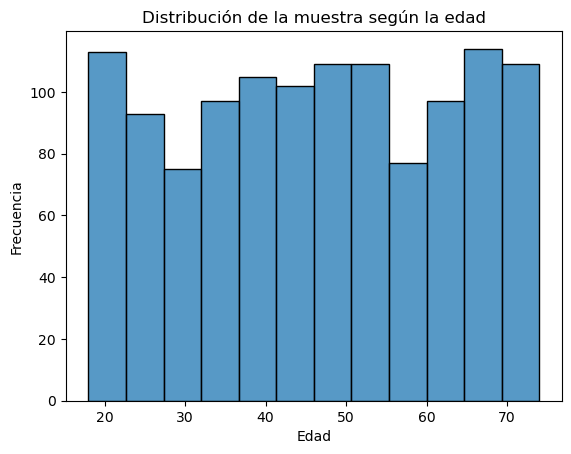

In [88]:
# Como se distribuye la edad

sns.histplot(data=df_ans_dep, x='Age', multiple="stack", palette="viridis")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title('Distribuci칩n de la muestra seg칰n la edad')
plt.show()

**Interpretacion**: la distribuci칩n de la edad en la muestra es relativamente homog칠nea, con una representaci칩n equilibrada de los diferentes rangos de edad. Tenemos perfiles desde los 18 hasta los 74, siendo la media de edad 46 a침os. 

Sin embargo, investigaciones previas han mostrado que los trastornos de ansiedad y depresi칩n tienden a ser m치s prevalentes en personas j칩venes y adultas, lo que podr칤a indicar una mayor vulnerabilidad de estos grupos a factores estresantes en el contexto actual. Ser칤a interesante explorar esto m치s en detalle y ver como se relacion la edad con esas variables

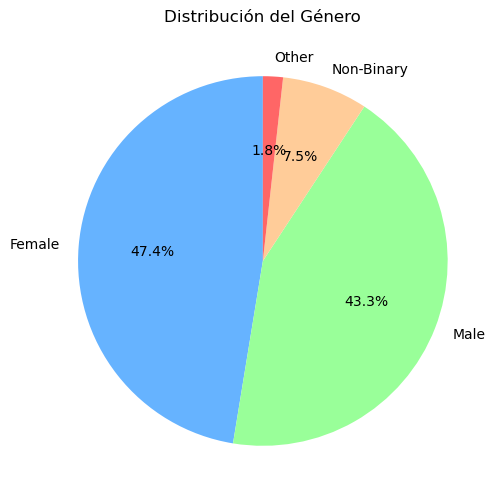

In [89]:
# Como se dstribuye el g칠nero

gender_counts = df_ans_dep['Gender'].value_counts()

# Crear el gr치fico de pastel
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Distribuci칩n del G칠nero')
plt.ylabel('')
plt.show()

**Interpretaci칩n**: la distribuci칩n de g칠nero en la muestra es bastante equilibrada, con una ligera mayor칤a de mujeres (47.4%) y una representaci칩n casi equivalente de hombres (43.3%). Adem치s, se incluye un 7,5% de personas no binarias y un 1,8% de otras identidades de g칠nero. Esta diversidad en la muestra permite una an치lisis m치s inclusivo de c칩mo la ansiedad y la depresi칩n pueden afectar a personas de diferentes g칠neros.

Este equilibrio es importante porque garantiza que los resultados no est칠n sesgados hacia un solo g칠nero. El hecho de incluir una proporci칩n significativa de personas no binarias y otras identidades de g칠nero tambi칠n hace que el an치lisis sea m치s representativo de las experiencias de todos los g칠neros.

En la literatura cient칤fica, se ha documentado que las mujeres tienen una mayor prevalencia de trastornos de ansiedad y depresi칩n en comparaci칩n con los hombres, lo que podr칤a reflejarse en los resultados de este estudio. Sin embargo, es importante analizar si las experiencias de las personas no binarias y otras identidades de g칠nero tambi칠n reflejan patrones similares o diferentes. La inclusi칩n de estos grupos podr칤a ofrecer una visi칩n m치s completa de c칩mo la ansiedad y la depresi칩n afectan a personas fuera del binomio tradicional de g칠nero.

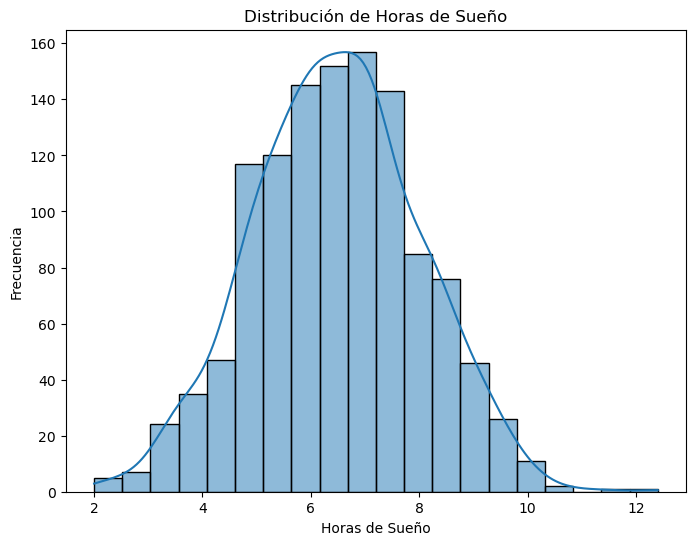

In [73]:
# como se distribuye las horas de sue침o

plt.figure(figsize=(8, 6))
sns.histplot(df_ans_dep['Sleep Hours'], bins=20, kde=True)
plt.title('Distribuci칩n de Horas de Sue침o')
plt.xlabel('Horas de Sue침o')
plt.ylabel('Frecuencia')
plt.show()

**Interpretaci칩n**: La distribuci칩n de las horas de sue침o sigue una tendencia normal, con la mayor칤a de los sujetos durmiendo entre 6 y 8 horas. Se observa una menor frecuencia en los extremos (2-4h y 10-12h), lo que sugiere que los patrones de sue침o m치s comunes se concentran en este rango intermedio.

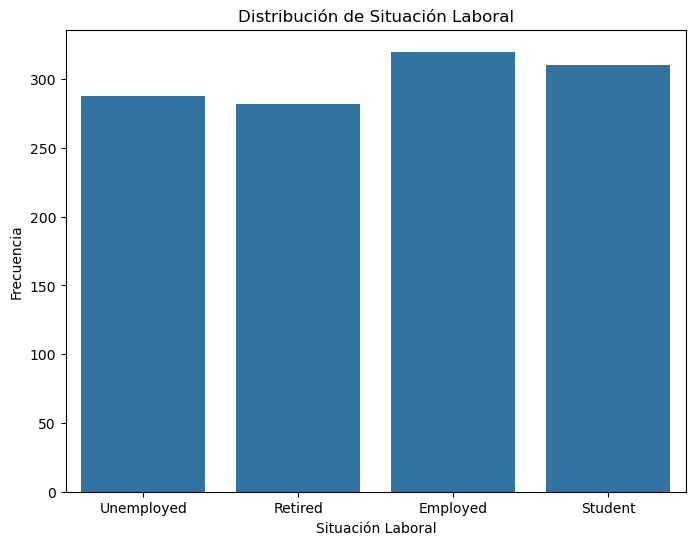

In [90]:
# como se distribuye situacion laboral

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employment Status')
plt.title('Distribuci칩n de Situaci칩n Laboral')
plt.xlabel('Situaci칩n Laboral')
plt.ylabel('Frecuencia')
plt.show()

**Interpretaci칩n**: La distribuci칩n de la situaci칩n laboral es bastante homog칠nea, con una representaci칩n equilibrada de los distintos grupos: estudiantes, desempleados, activos y jubilados. Esto sugiere una diversidad en el perfil laboral de los sujetos analizados.

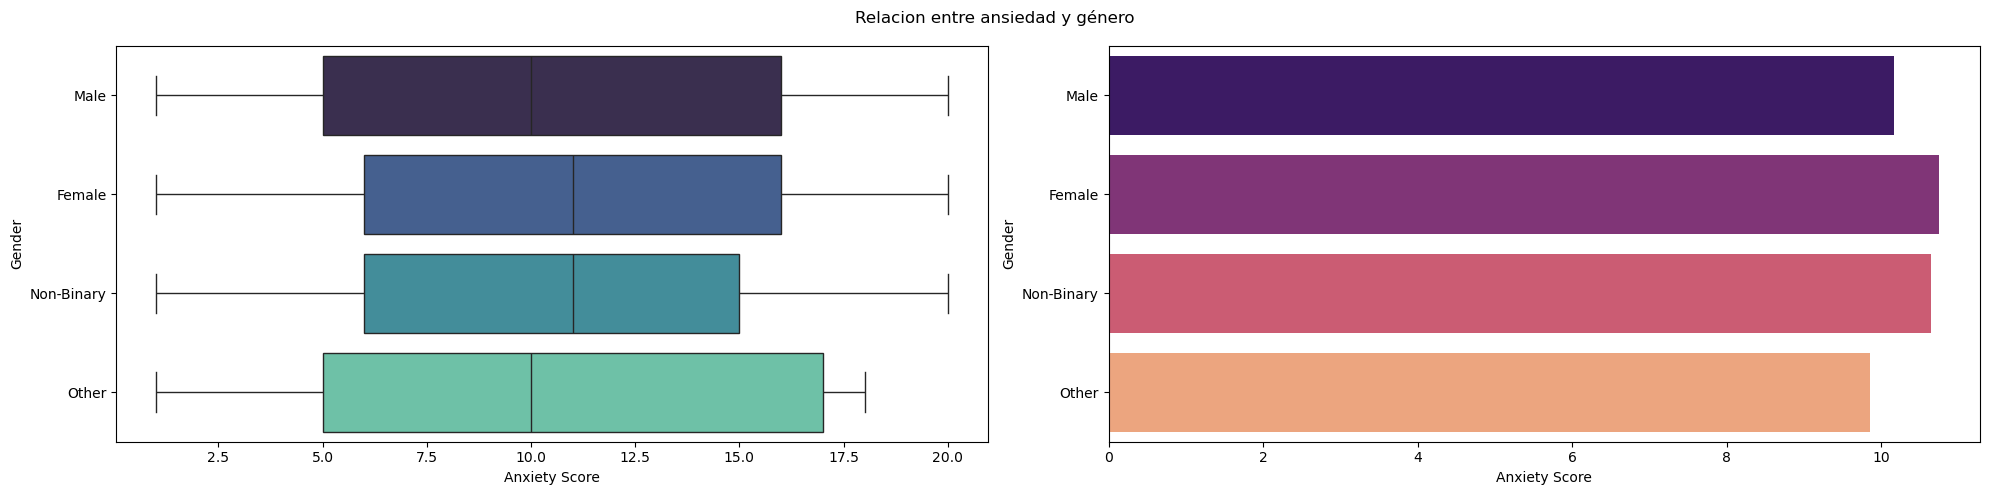

In [91]:
# relacion entre "Anxiety Score" y "Gender" 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.boxplot(x = "Anxiety Score", 
            y = "Gender", 
            data = df_ans_dep, 
            ax = axes[0], 
            palette= "mako")


# creamos nuestro primer barplot. 游늷 LO QUE NOS MUESTRA ES LA MEDIA DE EDAD EN FUNCI칍N DEL ESTADO CIVIL
sns.barplot(x = "Anxiety Score", 
            y = "Gender", 
            data = df_ans_dep,
            ci = None,
            ax = axes[1], 
            palette = "magma")

plt.suptitle("Relacion entre ansiedad y g칠nero")

# a침adimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gr치fica
plt.tight_layout()

**Interpretaci칩n**: 
- En el gr치fico de la izquierda (boxplot) se muestra la distribuci칩n de la variable *Ansiedad* en cada uno de los cuatro grupos seg칰n el g칠nero. Observamos que la distribuci칩n en todos los grupos es bastante similar, aunque el rango de puntuaciones en 'hombres' y en 'no binarios' es algo m치s amplio. Adem치s la mediana tambi칠n es m치s baja en estos grupos, podr칤a indicar que la mayor칤a de los individuos en estos grupos reportan niveles de ansiedad m치s bajos, pero es esencial profundizar en el an치lisis para comprender si este patr칩n se mantiene en todos los grupos y qu칠 factores podr칤an influir en estos resultados. Adem치s, convendr칤a investigar si la diferencia observada es estad칤sticamente significativa.

- En la gr치fica de la derecha (barplot) se muestra la puntuaci칩n media de ansiedad para cada grupo. Las puntuaciones son bastante similares entre los cuatro grupos, siendo ligeramente m치s altas en mujeres y personas no binarias. Sin embargo, la diferencia con los otros grupos parece m칤nima, por lo que ser칤a necesario realizar un an치lisis estad칤stico para determinar si es significativa.

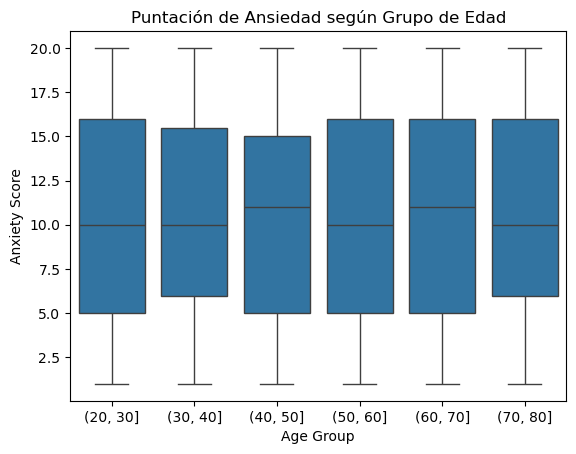

In [92]:
# Relacion entre ansiedad y edad
df_ans_dep['Age Group'] = pd.cut(df_ans_dep['Age'], bins=[20, 30, 40, 50, 60, 70, 80])

sns.boxplot(x='Age Group', y='Anxiety Score', data=df_ans_dep)
plt.title('Puntaci칩n de Ansiedad seg칰n Grupo de Edad')
plt.show()

**Interpretaci칩n**: al agrupar por rangos de edad de 10 a침os, vemos que la distribuci칩n es bastante pareja en cuanto a la puntuaci칩n en *Ansiedad*, siendo adem치s la mediana de los distintos grupos muy parecida. 

La distribuci칩n de la puntuaci칩n en *Ansiedad* es bastante uniforme en todos los rangos de edad, con medianaas similares en cada grupo, lo que sugiere que la ansiedad no est치 fuertemente influenciada por la edad en esta muestra. Esto podr칤a indicar que los niveles de ansiedad son consistentes a trav칠s de diferentes etapas de la vida, aunque ser칤a 칰til explorar si otros factores (como g칠nero, situaci칩n laboral o factores sociales) podr칤an estar influyendo en estos resultados

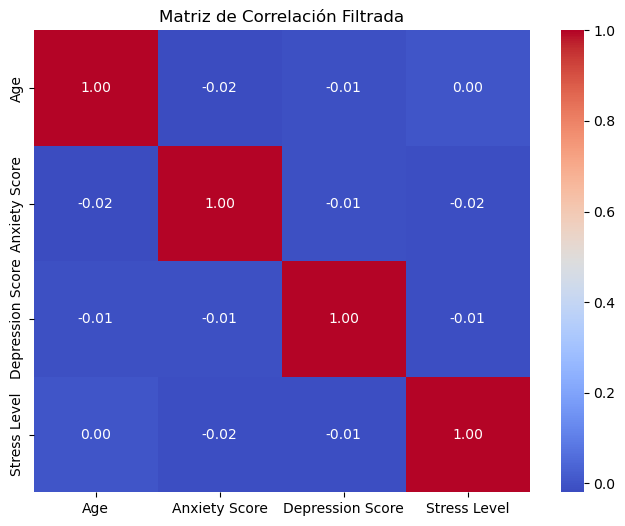

In [ ]:
# Correlacion entre medidas num칠ricas
cols = ['Age', 'Anxiety Score', 'Depression Score', 'Stress Level'] 

correlation_matrix = df_ans_dep[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlaci칩n Filtrada')
plt.show()

**Interpretaci칩n**: en la matriz de correlaci칩n, la puntuaci칩n m치s alta observada es -0.02, lo que indica que no existen relaciones fuertes entre las variables 'Edad', 'Puntuaci칩n de Ansiedad', 'Puntuaci칩n de Depresi칩n' y 'Nivel de Estr칠s'. Esto sugiere que, en este conjunto de datos, las variables analizadas est치n d칠bilmente correlacionadas entre s칤, lo que implica que no hay una asociaci칩n clara o significativa entre ellas.

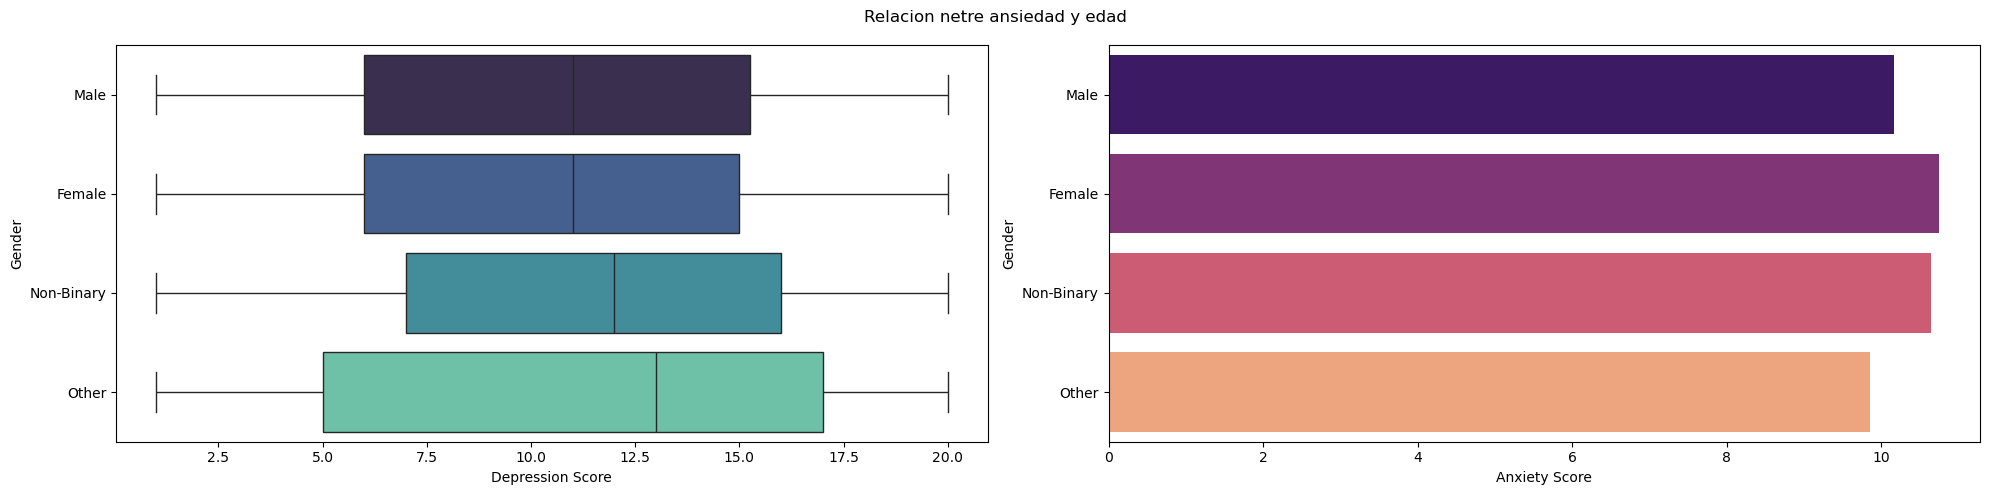

In [ ]:
# Relacion entre "Depression Score" y "Gender"

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.boxplot(x = "Depression Score", 
            y = "Gender", 
            data = df_ans_dep, 
            ax = axes[0], 
            palette= "mako")

sns.barplot(x = "Anxiety Score", 
            y = "Gender", 
            data = df_ans_dep,
            ci = None,
            ax = axes[1], 
            palette = "magma")

plt.suptitle("Relacion entre ansiedad y edad")
plt.tight_layout()

**Interpretaci칩n**: 
- en el gr치fico de la izquierda (boxplot) podemos ver que la mediana de las puntuaciones de depresi칩n es ligeramente m치s alta en los grupos 'no binarios' y 'otros g칠neros' en comparaci칩n con hombres y mujeres, lo que indica que, en el 50% central de los datos, los niveles de depresi칩n son un poco m치s elevados en estos dos grupos.

- en la gr치fica de la izquierda (barplot), la media muestra una tendencia similar, con puntuaciones ligeramente m치s altas en 'mujeres' y 'no binarios'.

Analizando por grupos resaltar:
- 'grupo no binario': la diferencia entre la media y la mediana sugiere que la distribuci칩n de las puntuaciones est치 sesgada hacia la baja. Esto significa que existen algunos individuos con puntuaciones de depresi칩n significativamente m치s bajas que est치n reduciendo la media, pero la mayor칤a de las personas en este grupo tienen puntuaciones m치s altas (porque la mediana es m치s alta).
Aunque algunos individuos reportan puntuaciones bajas de depresi칩n, la mayor칤a tienen puntuaciones m치s altas, y la mediana refleja mejor el valor t칤pico del grupo.

- 'grupo otros g칠neros': la mediana es mayor que la media, lo que indica que la distribuci칩n est치 sesgada hacia los valores altos. Es decir, algunos individuos tienen puntuaciones de depresi칩n muy bajas, lo que arrastra la media hacia abajo, pero la mayor칤a de las personas en este grupo tiene puntuaciones de depresi칩n m치s altas, lo que hace que la mediana sea m치s alta.
Conclusi칩n: Aunque algunos individuos con puntuaciones bajas est치n afectando la media, el valor central (mediana) refleja que, en general, la mayor칤a de las personas en este grupo reportan puntuaciones de depresi칩n m치s altas.

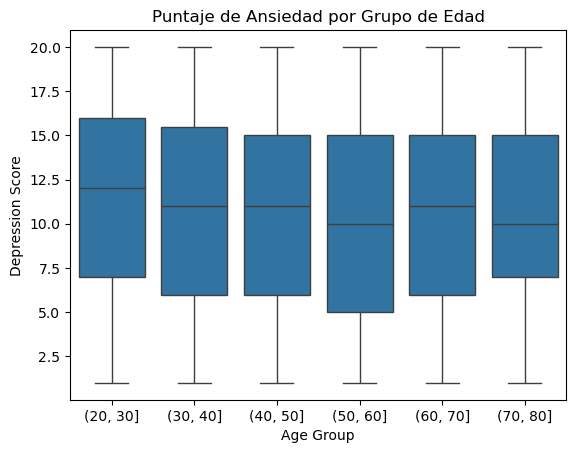

In [79]:
## relacion entre "Depression Score" y "Age"

df_ans_dep['Age Group'] = pd.cut(df_ans_dep['Age'], bins=[20, 30, 40, 50, 60, 70, 80])

sns.boxplot(x='Age Group', y='Depression Score', data=df_ans_dep)
plt.title('Puntaje de Ansiedad por Grupo de Edad')
plt.show()

**Interpretaci칩n**: al agrupar por rangos de edad de 10 a침os, vemos que la distribuci칩n es bastante pareja en cuanto a la puntuaci칩n en *Depresi칩n*, siendo adem치s la mediana de los distintos grupos bastante parecida. 

La distribuci칩n de la puntuaci칩n en *Depresi칩n* es bastante uniforme en todos los rangos de edad, con medianaas similares en cada grupo, lo que sugiere que la depresi칩n no est치 fuertemente influenciada por la edad en esta muestra. Esto podr칤a indicar que los niveles de depresi칩n son consistentes a trav칠s de diferentes etapas de la vida, aunque ser칤a 칰til explorar si otros factores (como g칠nero, situaci칩n laboral o factores sociales) podr칤an estar influyendo en estos resultados.

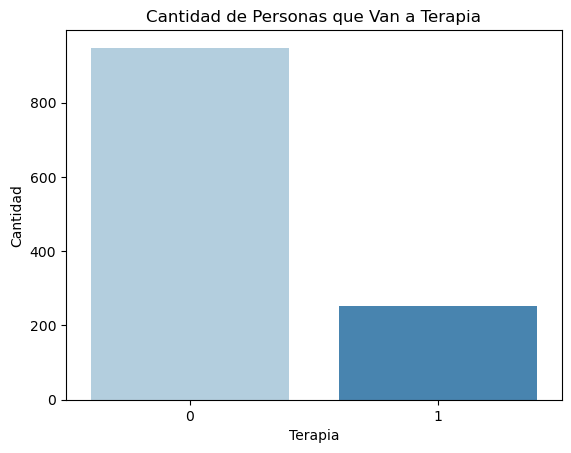

In [80]:
## An치lisis de cuantos de los individuos analizados van a terapia

sns.countplot(data = df_ans_dep, x = 'Therapy', palette = 'Blues')

# Personalizar el gr치fico
plt.title('Cantidad de Personas que Van a Terapia')
plt.xlabel('Terapia')
plt.ylabel('Cantidad')

# Mostrar el gr치fico
plt.show()

**Interpretacion**: en cuanto a la asistencia a terapia, la mayor칤a de las personas no asisten (valor 0), mientras que un n칰mero significativamente menor asiste regularmente (valor 1). Esto sugiere que, en la muestra analizada, la mayor칤a no est치 recibiendo apoyo terap칠utico, mientras que solo una peque침a proporci칩n lo hace.

Convendr칤a analizar esto m치s en detalle, para ver si hay diferencias por ejemplo en los nivels de estr칠s, ansiedad y depresi칩n en funci칩n de si van a terapia o no.

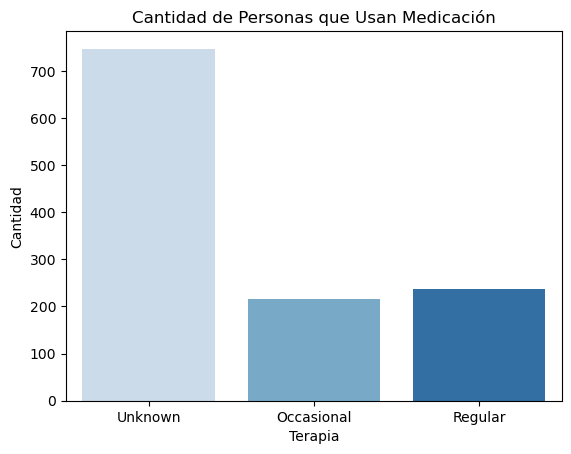

In [81]:
## An치lisis de cuantos de los individuos analizados usan medicaci칩n

sns.countplot(data = df_ans_dep, x = 'Medication Use', palette = 'Blues')

# Personalizar el gr치fico
plt.title('Cantidad de Personas que Usan Medicaci칩n')
plt.xlabel('Terapia')
plt.ylabel('Cantidad')

# Mostrar el gr치fico
plt.show()

**Interpretaci칩n**: hay que recordar que aqu칤 ten칤amos casi un 60% de valores nulos, lo que ahora se refleja como "Unknown". Del resto de valores vemos, que la proporci칩n de uso de medicaci칩n se divide de forma bastante pareja entre los grupos que la usan de manera ocasional y los que la usan de manera regular. 

Convendr칤a explorar esto m치s en detalle, saber por qu칠 tenemos tantos datos faltantes y tenerlo muy en cuenta de cara a sacar conlusiones. 

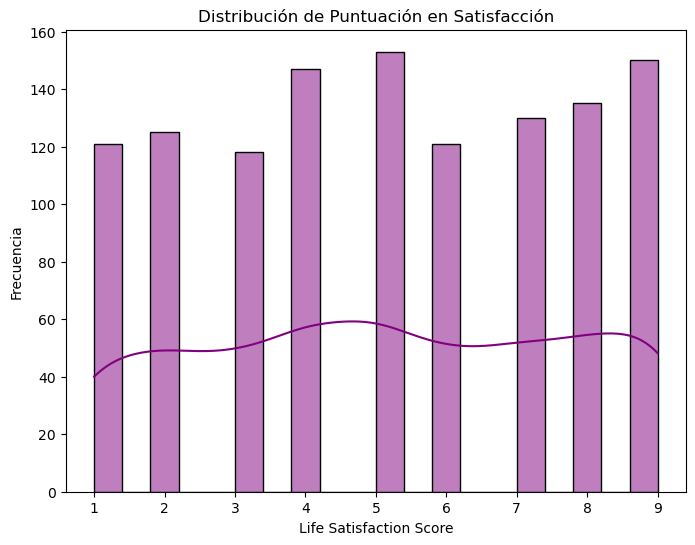

In [98]:
# Crear un histograma para la distribuci칩n de Life Satisfaction Score
plt.figure(figsize=(8, 6))
sns.histplot(df_ans_dep['Life Satisfaction Score'], kde=True, color='purple', bins=20)  # Agrega kde para la curva de densidad
plt.title('Distribuci칩n de Puntuaci칩n en Satisfacci칩n')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('Frecuencia')
plt.show()

**Interpretacion**: El histograma de satisfacci칩n muestra una distribuci칩n bastante uniforme a lo largo de las 9 posibles puntuaciones (de 1 a 9), lo que sugiere que los niveles de satisfacci칩n en la muestra son diversos y no se inclinan hacia una puntuaci칩n espec칤fica. Esto indica que los participantes tienen opiniones variadas, sin una tendencia clara hacia una puntuaci칩n m치s alta o baja.

Ser칤a relevante estudiar si otras variables (como edad, g칠nero, situaci칩n laboral as칤 como estr칠s, ansiedad y depresi칩n) influyen en que la puntuaci칩n general sea m치s alta o baja, ya que estas podr칤an tener un impacto en los niveles de satisfacci칩n reportados

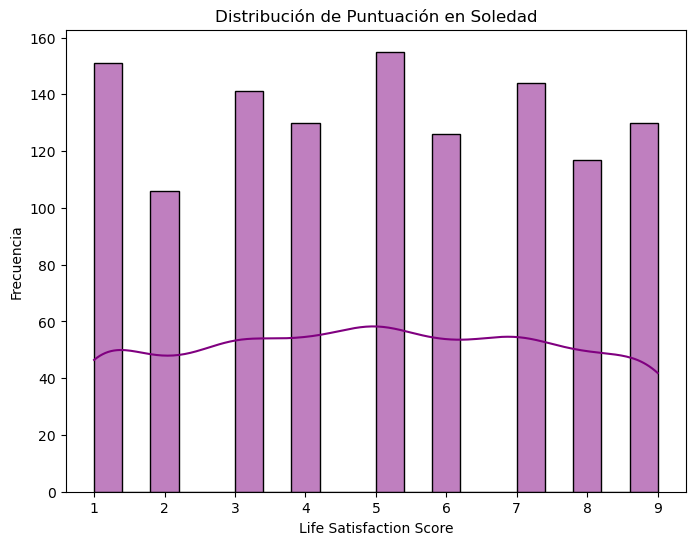

In [97]:
# Crear un histograma para la distribuci칩n de Loneliness Score

plt.figure(figsize=(8, 6))
sns.histplot(df_ans_dep['Loneliness Score'], kde=True, color='purple', bins=20)  # Agrega kde para la curva de densidad
plt.title('Distribuci칩n de Puntuaci칩n en Soledad')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('Frecuencia')
plt.show()

**Interpretacion**: las respuestas est치n distribuidas de manera uniforme entre los diferentes niveles de soledad, sin una concentraci칩n notable en puntuaciones bajas o altas. Sin embargo, ser칤a 칰til explorar si otras variables influyen en esta distribuci칩n y si afectan la percepci칩n de la soledad en los individuos.

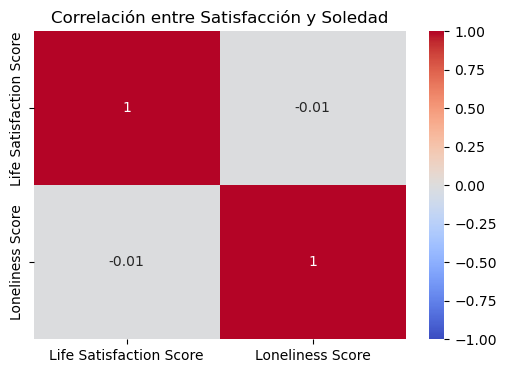

In [95]:
corr_data = df_ans_dep[['Life Satisfaction Score', 'Loneliness Score']]

# Crear un heatmap de correlaci칩n
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gr치fico
plt.title('Correlaci칩n entre Satisfacci칩n y Soledad')
plt.show()

**Interpretaci칩n**: la correlaci칩n entre satisfacci칩n y soledad es de -0.01, lo que indica una relaci칩n extremadamente d칠bil y casi nula entre ambas variables. Esto sugiere que, en esta muestra, no existe una asociaci칩n significativa entre los niveles de satisfacci칩n y soledad, aunque ser칤a recomendable realizar un an치lisis m치s profundo para explorar posibles factores adicionales que puedan influir en esta relaci칩n

In [99]:
# Hago copia de datos

df_ans_dep.to_csv("anxiety_depression_final.csv")